## Import Library ##

In [158]:
from google_play_scraper import app, reviews, Sort, reviews_all
import pandas as pd 
pd.options.mode.chained_assignment = None  
import numpy as np  
seed = 0
np.random.seed(seed)  
import matplotlib.pyplot as plt  
import seaborn as sns 

import datetime as dt  
import re  
import string  
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords  


from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  

from wordcloud import WordCloud 
import nltk  
nltk.download('punkt_tab')  
nltk.download('stopwords')  

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading Dataset

In [159]:
df = pd.read_csv("dataset_reviews.csv")
df.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ff190850-851e-43b3-935b-775af97635f4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"aplikasi nya bagus... banyak diskon besar besaran dan gak bikin kantong jebol, tapiiii kenapa di batasi sihhh kalo pesan COD harus cuma 3 pesanan, sisa nya gak bisa cod karena dibatasi..tolong dari pihak Shopee.... tolong aplikasi nya di perbarui agar bisa pesan COD sepuasnya tanpa dibatasi...,kalo kaya gini gimana bisa pesan lebih banyak dengan mudah",4,101,3.46.37,2025-04-01 22:18:54,"Hi kak Violita Hasanah, maaf ya udah bikin kamu ga nyaman terkait kendala COD yg tidak bisa digunakan. Aku bantu infoin pembatasan tsb ditujukan agar tidak terjadi penyalahgunaan fitur COD oleh oknum yg tidak bertanggungjawab ya kak. Jika masih terkendala, kakak bisa DM aku dgn melampirkan username km ke DM IG @Shopee_ID ya kak. Sehat selalu ^CV",2025-04-01 23:18:00,3.46.37
1,9d318067-d922-4496-a52e-c4e2027863cc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Mohon tolong perbaiki sistem jaringan pada aplikasi. Sering sekali terjadi, saya tidak bisa memesan makanan/produk dikarenakan sistem jaringannya bermasalah padahal koneksi jaringan internet di ponsel saya bagus. Sering sekali juga saya tidak membuka menu pilihan pada aplikasi dan tidak bisa mendapatkan driver. Mohon segera diperbaiki, terima kasih.",4,6,3.47.37,2025-04-02 22:10:44,"Hi Kak Satrio Wisnu Hardiyanto , Maaf ya untuk kendalanya.\nAku bantu infoin Kakak bisa clear cache pada aplikasi, lalu pastikan juga Kakak memiliki internet yang stabil, dan login logout akunmu kembali. Tapi kalo nanti masih terkendala, jangan ragu hubungi aku di DM Shopeecare_id yang ada centang birunya. Stay Healthy ^OM",2025-04-02 22:07:55,3.47.37
2,8e11b026-dcdf-47cf-a372-ab71f49f3a85,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"pembelian bagus, tapi untuk menjual barang saat upload foto barang kenapa ya beberapa foto yang digaleri jelas tersimpan itu kadang gak muncul di shopee nya, jadi tiap mau upload foto harus screenshot dulu fotonya baru muncul hasil ss nya, itupun anehnya berurutan dari foto lama dulu kalo discroll jauh kebawah baru foto terbaru kadangpun urutan fotonya acak, jadi nyari foto pun harus scroll ke paling bawah dulu baru nemu.. bisa diperbaiki?",3,3,3.46.37,2025-04-02 15:11:38,"Hi kak Maulana Hanif, mohon maaf atas ketidaknyamanannya terkait kendala kakak. Agar aku bisa bantu, aku saranin kakak buat infoin Username kakak dan detail kendala kakak saat mengupload produk ke DM sosial media resmi kita @Shopee_id yaa. Stay Safe^SM",2025-04-02 16:49:33,3.46.37
3,1391c1f4-0880-437c-87c0-66fb25e543ed,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"appnya udah bagus, tapi masih ada beberapa yang kurang, pertama dari pengiriman, bagusnya nomor kurir udah di taruh di info pengiriman paketnya, jadi customer bisa langsung menghubungi kurir, karna kebanyakan kurir biasanya hanya mengechat Ketika sudah ada di lokasi atau di wilayah, kedua di bagian rating, beberapa toko ada yang memakai akun kedua atau akun dari pekerja untuk memberi rating tinggi, dan itu adalah cara curang tentunya",4,43,3.46.37,2025-04-01 18:01:25,"Hai kak, terima kasih ya untuk feedbacknya. Kedepannya shopee akan terus berusaha lebih baik lagi agar para pengguna lebih nyaman dalam menggunakan shopee. Kalo ada kendala/pertanyaan lainnya bisa DM ke Social Media kita @ShopeeID/@Shopeecare. Happy Shopping ^EA",2025-04-01 19:18:42,3.46.37
4,4e5b3431-922b-4a0d-a226-22d2850dcca7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f

In [160]:
# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = df.shape
print(f"Jumlah ulasan: {jumlah_ulasan}, Jumlah kolom: {jumlah_kolom}")


Jumlah ulasan: 58563, Jumlah kolom: 11


In [161]:
# Menampilkan informasi tentang DataFrame df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58563 entries, 0 to 58562
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              58563 non-null  object
 1   userName              58563 non-null  object
 2   userImage             58563 non-null  object
 3   content               58563 non-null  object
 4   score                 58563 non-null  int64 
 5   thumbsUpCount         58563 non-null  int64 
 6   reviewCreatedVersion  58563 non-null  object
 7   at                    58563 non-null  object
 8   replyContent          58563 non-null  object
 9   repliedAt             58563 non-null  object
 10  appVersion            58563 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.9+ MB


In [162]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN
clean_df = df.dropna()

In [163]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58563 entries, 0 to 58562
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              58563 non-null  object
 1   userName              58563 non-null  object
 2   userImage             58563 non-null  object
 3   content               58563 non-null  object
 4   score                 58563 non-null  int64 
 5   thumbsUpCount         58563 non-null  int64 
 6   reviewCreatedVersion  58563 non-null  object
 7   at                    58563 non-null  object
 8   replyContent          58563 non-null  object
 9   repliedAt             58563 non-null  object
 10  appVersion            58563 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.9+ MB


In [164]:
#Cek duplikat
jumlah_duplikat = clean_df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape
print(f"Jumlah ulasan setelah menghapus duplikat: {jumlah_ulasan_setelah_hapus_duplikat}")
print(f"Jumlah kolom setelah menghapus duplikat: {jumlah_kolom_setelah_hapus_duplikat}")

Jumlah baris duplikat: 0
Jumlah ulasan setelah menghapus duplikat: 58563
Jumlah kolom setelah menghapus duplikat: 11


# Preprocessing

In [165]:
#Memprocess Teks
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [166]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [167]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ff190850-851e-43b3-935b-775af97635f4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"aplikasi nya bagus... banyak diskon besar besaran dan gak bikin kantong jebol, tapiiii kenapa di batasi sihhh kalo pesan COD harus cuma 3 pesanan, sisa nya gak bisa cod karena dibatasi..tolong dari pihak Shopee.... tolong aplikasi nya di perbarui agar bisa pesan COD sepuasnya tanpa dibatasi...,kalo kaya gini gimana bisa pesan lebih banyak dengan mudah",4,101,3.46.37,2025-04-01 22:18:54,"Hi kak Violita Hasanah, maaf ya udah bikin kamu ga nyaman terkait kendala COD yg tidak bisa digunakan. Aku bantu infoin pembatasan tsb ditujukan agar tidak terjadi penyalahgunaan fitur COD oleh oknum yg tidak bertanggungjawab ya kak. Jika masih terkendala, kakak bisa DM aku dgn melampirkan username km ke DM IG @Shopee_ID ya kak. Sehat selalu ^CV",2025-04-01 23:18:00,3.46.37
1,9d318067-d922-4496-a52e-c4e2027863cc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Mohon tolong perbaiki sistem jaringan pada aplikasi. Sering sekali terjadi, saya tidak bisa memesan makanan/produk dikarenakan sistem jaringannya bermasalah padahal koneksi jaringan internet di ponsel saya bagus. Sering sekali juga saya tidak membuka menu pilihan pada aplikasi dan tidak bisa mendapatkan driver. Mohon segera diperbaiki, terima kasih.",4,6,3.47.37,2025-04-02 22:10:44,"Hi Kak Satrio Wisnu Hardiyanto , Maaf ya untuk kendalanya.\nAku bantu infoin Kakak bisa clear cache pada aplikasi, lalu pastikan juga Kakak memiliki internet yang stabil, dan login logout akunmu kembali. Tapi kalo nanti masih terkendala, jangan ragu hubungi aku di DM Shopeecare_id yang ada centang birunya. Stay Healthy ^OM",2025-04-02 22:07:55,3.47.37
2,8e11b026-dcdf-47cf-a372-ab71f49f3a85,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"pembelian bagus, tapi untuk menjual barang saat upload foto barang kenapa ya beberapa foto yang digaleri jelas tersimpan itu kadang gak muncul di shopee nya, jadi tiap mau upload foto harus screenshot dulu fotonya baru muncul hasil ss nya, itupun anehnya berurutan dari foto lama dulu kalo discroll jauh kebawah baru foto terbaru kadangpun urutan fotonya acak, jadi nyari foto pun harus scroll ke paling bawah dulu baru nemu.. bisa diperbaiki?",3,3,3.46.37,2025-04-02 15:11:38,"Hi kak Maulana Hanif, mohon maaf atas ketidaknyamanannya terkait kendala kakak. Agar aku bisa bantu, aku saranin kakak buat infoin Username kakak dan detail kendala kakak saat mengupload produk ke DM sosial media resmi kita @Shopee_id yaa. Stay Safe^SM",2025-04-02 16:49:33,3.46.37
3,1391c1f4-0880-437c-87c0-66fb25e543ed,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"appnya udah bagus, tapi masih ada beberapa yang kurang, pertama dari pengiriman, bagusnya nomor kurir udah di taruh di info pengiriman paketnya, jadi customer bisa langsung menghubungi kurir, karna kebanyakan kurir biasanya hanya mengechat Ketika sudah ada di lokasi atau di wilayah, kedua di bagian rating, beberapa toko ada yang memakai akun kedua atau akun dari pekerja untuk memberi rating tinggi, dan itu adalah cara curang tentunya",4,43,3.46.37,2025-04-01 18:01:25,"Hai kak, terima kasih ya untuk feedbacknya. Kedepannya shopee akan terus berusaha lebih baik lagi agar para pengguna lebih nyaman dalam menggunakan shopee. Kalo ada kendala/pertanyaan lainnya bisa DM ke Social Media kita @ShopeeID/@Shopeecare. Happy Shopping ^EA",2025-04-01 19:18:42,3.46.37
4,4e5b3431-922b-4a0d-a226-22d2850dcca7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f

In [168]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [169]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,ff190850-851e-43b3-935b-775af97635f4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"aplikasi nya bagus... banyak diskon besar besaran dan gak bikin kantong jebol, tapiiii kenapa di batasi sihhh kalo pesan COD harus cuma 3 pesanan, sisa nya gak bisa cod karena dibatasi..tolong dari pihak Shopee.... tolong aplikasi nya di perbarui agar bisa pesan COD sepuasnya tanpa dibatasi...,kalo kaya gini gimana bisa pesan lebih banyak dengan mudah",4,101,3.46.37,2025-04-01 22:18:54,"Hi kak Violita Hasanah, maaf ya udah bikin kamu ga nyaman terkait kendala COD yg tidak bisa digunakan. Aku bantu infoin pembatasan tsb ditujukan agar tidak terjadi penyalahgunaan fitur COD oleh oknum yg tidak bertanggungjawab ya kak. Jika masih terkendala, kakak bisa DM aku dgn melampirkan username km ke DM IG @Shopee_ID ya kak. Sehat selalu ^CV",2025-04-01 23:18:00,3.46.37,aplikasi nya bagus banyak diskon besar besaran dan gak bikin kantong jebol tapiiii kenapa di batasi sihhh kalo pesan COD harus cuma pesanan sisa nya gak bisa cod karena dibatasitolong dari pihak Shopee tolong aplikasi nya di perbarui agar bisa pesan COD sepuasnya tanpa dibatasikalo kaya gini gimana bisa pesan lebih banyak dengan mudah,aplikasi nya bagus banyak diskon besar besaran dan gak bikin kantong jebol tapiiii kenapa di batasi sihhh kalo pesan cod harus cuma pesanan sisa nya gak bisa cod karena dibatasitolong dari pihak shopee tolong aplikasi nya di perbarui agar bisa pesan cod sepuasnya tanpa dibatasikalo kaya gini gimana bisa pesan lebih banyak dengan mudah,aplikasi nya bagus banyak diskon besar besaran dan gak bikin kantong jebol tapiiii kenapa di batasi sihhh kalau pesan bayar ditempat harus cuma pesanan sisa nya gak bisa bayar ditempat karena dibatasitolong dari pihak shopee tolong aplikasi nya di perbarui agar bisa pesan bayar ditempat sepuasnya tanpa dibatasikalo kaya gini bagaimana bisa pesan lebih banyak dengan mudah,"[aplikasi, nya, bagus, banyak, diskon, besar, besaran, dan, gak, bikin, kantong, jebol, tapiiii, kenapa, di, batasi, sihhh, kalau, pesan, bayar, ditempat, harus, cuma, pesanan, sisa, nya, gak, bisa, bayar, ditempat, karena, dibatasitolong, dari, pihak, shopee, tolong, aplikasi, nya, di, perbarui, agar, bisa, pesan, bayar, ditempat, sepuasnya, tanpa, dibatasikalo, kaya, gini, bagaimana, bisa, pesan, lebih, banyak, dengan, mudah]","[aplikasi, bagus, diskon, besaran, bikin, kantong, jebol, tapiiii, batasi, sihhh, pesan, bayar, ditempat, pesanan, sisa, bayar, ditempat, dibatasitolong, shopee, tolong, aplikasi, perbarui, pesan, bayar, ditempat, sepuasnya, dibatasikalo, kaya, gini, pesan, mudah]",aplikasi bagus diskon besaran bikin kantong jebol tapiiii batasi sihhh pesan bayar ditempat pesanan sisa bayar ditempat dibatasitolong shopee tolong aplikasi perbarui pesan bayar ditempat sepuasnya dibatasikalo kaya gini pesan mudah
1,9d318067-d922-4496-a52e-c4e2027863cc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Mohon tolong perbaiki sistem jaringan pada aplikasi. Sering sekali terjadi, saya tidak bisa memesan makanan/produk dikarenakan sistem jaringannya bermasalah padahal koneksi jaringan internet di ponsel saya bagus. Sering sekali juga saya tidak membuka menu pilihan pada aplikasi dan tidak bisa mendapatkan driver. Mohon segera diperbaiki, terima kasih.",4,6,3.47.37,2025-04-02 22:10:44,"Hi Kak Satrio Wisnu Hardiyanto , Maaf ya untuk kendalanya.\nAku bantu infoin Kakak bisa clear cache pada aplikasi, lalu pastikan juga Kakak memiliki internet yang stabil, dan login logout akunmu kembali. Tapi kalo nanti masih terkendala, jangan ragu hubungi aku di DM Shopeecare_id yang ada centang biru

# Pelabelan

In [170]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/AmirRazer/Belajar-Pengembangan-Machine-Learning/refs/heads/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/AmirRazer/Belajar-Pengembangan-Machine-Learning/refs/heads/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata Netral dari GitHub
lexicon_netral = dict()

response = requests.get('https://raw.githubusercontent.com/AmirRazer/Belajar-Pengembangan-Machine-Learning/refs/heads/main/lexicon_netral.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_netral[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch netral lexicon data")


In [171]:
# Fungsi untuk menentukan polaritas sentimen dari tweet
def sentiment_analysis_lexicon_indonesia(text):
    # Inisialisasi skor sentimen ke 0
    score = 0
    #for word in text:
    for word in text:
        # Mengulangi setiap kata dalam teks
        if (word in lexicon_positive):
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
            score = score + lexicon_positive[word]
    # Mengulangi setiap kata dalam teks (sekali lagi)
    for word in text:
        if (word in lexicon_negative):
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen
            score = score + lexicon_negative[word]
    # Inisialisasi variabel polaritas
    polarity=''
    if (score >= 1):
        polarity = 'positive'
    elif (score <= -1 ):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    # Mengembalikan skor sentimen dan polaritas teks
    return score, polarity

In [172]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    28799
negative    25538
neutral      4226
Name: count, dtype: int64


In [173]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,ff190850-851e-43b3-935b-775af97635f4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"aplikasi nya bagus... banyak diskon besar besaran dan gak bikin kantong jebol, tapiiii kenapa di batasi sihhh kalo pesan COD harus cuma 3 pesanan, sisa nya gak bisa cod karena dibatasi..tolong dari pihak Shopee.... tolong aplikasi nya di perbarui agar bisa pesan COD sepuasnya tanpa dibatasi...,kalo kaya gini gimana bisa pesan lebih banyak dengan mudah",4,101,3.46.37,2025-04-01 22:18:54,"Hi kak Violita Hasanah, maaf ya udah bikin kamu ga nyaman terkait kendala COD yg tidak bisa digunakan. Aku bantu infoin pembatasan tsb ditujukan agar tidak terjadi penyalahgunaan fitur COD oleh oknum yg tidak bertanggungjawab ya kak. Jika masih terkendala, kakak bisa DM aku dgn melampirkan username km ke DM IG @Shopee_ID ya kak. Sehat selalu ^CV",2025-04-01 23:18:00,3.46.37,aplikasi nya bagus banyak diskon besar besaran dan gak bikin kantong jebol tapiiii kenapa di batasi sihhh kalo pesan COD harus cuma pesanan sisa nya gak bisa cod karena dibatasitolong dari pihak Shopee tolong aplikasi nya di perbarui agar bisa pesan COD sepuasnya tanpa dibatasikalo kaya gini gimana bisa pesan lebih banyak dengan mudah,aplikasi nya bagus banyak diskon besar besaran dan gak bikin kantong jebol tapiiii kenapa di batasi sihhh kalo pesan cod harus cuma pesanan sisa nya gak bisa cod karena dibatasitolong dari pihak shopee tolong aplikasi nya di perbarui agar bisa pesan cod sepuasnya tanpa dibatasikalo kaya gini gimana bisa pesan lebih banyak dengan mudah,aplikasi nya bagus banyak diskon besar besaran dan gak bikin kantong jebol tapiiii kenapa di batasi sihhh kalau pesan bayar ditempat harus cuma pesanan sisa nya gak bisa bayar ditempat karena dibatasitolong dari pihak shopee tolong aplikasi nya di perbarui agar bisa pesan bayar ditempat sepuasnya tanpa dibatasikalo kaya gini bagaimana bisa pesan lebih banyak dengan mudah,"[aplikasi, nya, bagus, banyak, diskon, besar, besaran, dan, gak, bikin, kantong, jebol, tapiiii, kenapa, di, batasi, sihhh, kalau, pesan, bayar, ditempat, harus, cuma, pesanan, sisa, nya, gak, bisa, bayar, ditempat, karena, dibatasitolong, dari, pihak, shopee, tolong, aplikasi, nya, di, perbarui, agar, bisa, pesan, bayar, ditempat, sepuasnya, tanpa, dibatasikalo, kaya, gini, bagaimana, bisa, pesan, lebih, banyak, dengan, mudah]","[aplikasi, bagus, diskon, besaran, bikin, kantong, jebol, tapiiii, batasi, sihhh, pesan, bayar, ditempat, pesanan, sisa, bayar, ditempat, dibatasitolong, shopee, tolong, aplikasi, perbarui, pesan, bayar, ditempat, sepuasnya, dibatasikalo, kaya, gini, pesan, mudah]",aplikasi bagus diskon besaran bikin kantong jebol tapiiii batasi sihhh pesan bayar ditempat pesanan sisa bayar ditempat dibatasitolong shopee tolong aplikasi perbarui pesan bayar ditempat sepuasnya dibatasikalo kaya gini pesan mudah,-16,negative
1,9d318067-d922-4496-a52e-c4e2027863cc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Mohon tolong perbaiki sistem jaringan pada aplikasi. Sering sekali terjadi, saya tidak bisa memesan makanan/produk dikarenakan sistem jaringannya bermasalah padahal koneksi jaringan internet di ponsel saya bagus. Sering sekali juga saya tidak membuka menu pilihan pada aplikasi dan tidak bisa mendapatkan driver. Mohon segera diperbaiki, terima kasih.",4,6,3.47.37,2025-04-02 22:10:44,"Hi Kak Satrio Wisnu Hardiyanto , Maaf ya untuk kendalanya.\nAku bantu infoin Kakak bisa clear cache pada aplikasi, lalu pastikan juga Kakak memiliki internet yang stabil, dan login logout akunmu kembali. Tapi kalo nanti masih terkendala, jangan ragu hubungi aku di D

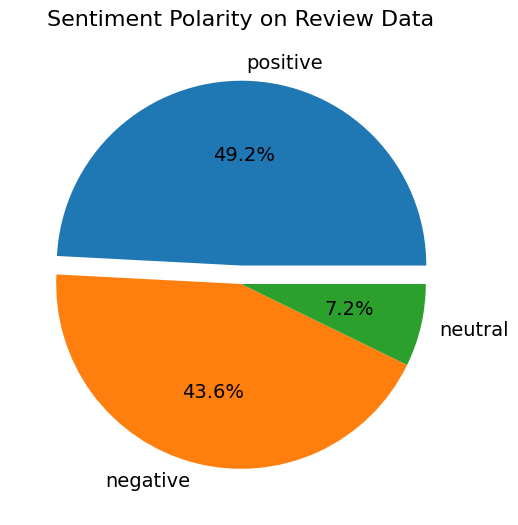

In [174]:
import matplotlib.pyplot as plt

#Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0,0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [175]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [176]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

In [177]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'netral_tweets' yang hanya berisi tweet dengan polaritas negatif.
netral_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'netral_tweets'.
netral_tweets = netral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'netral_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
netral_tweets = netral_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
netral_tweets = netral_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
netral_tweets = netral_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
netral_tweets.index += 1

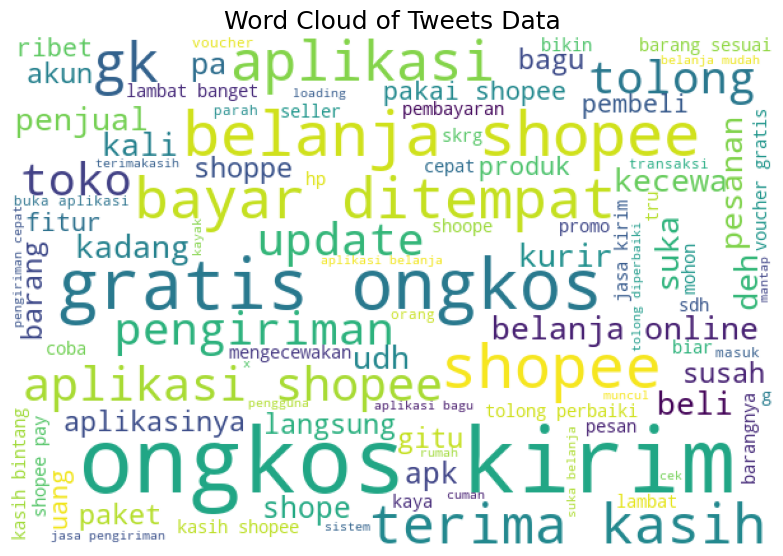

In [178]:
from collections import Counter
# Menggabungkan semua kata dari 'text_stopword' menggunakan join() untuk efisiensi
list_words = ' '.join(word for tweet in clean_df['text_stopword'] for word in tweet)
word_freq = Counter(word for tweet in clean_df['text_stopword'] for word in tweet)

# Membuat objek WordCloud dengan parameter tertentu
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
# Jika menggunakan frekuensi: wordcloud.generate_from_frequencies(word_freq)

# Membuat gambar dan sumbu untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu
ax.grid(False)

# Menampilkan word cloud dalam gambar
ax.imshow(wordcloud)

# Mengatur layout gambar
fig.tight_layout(pad=0)

# Menyembunyikan sumbu
ax.axis('off')

# Menampilkan word cloud
plt.show()

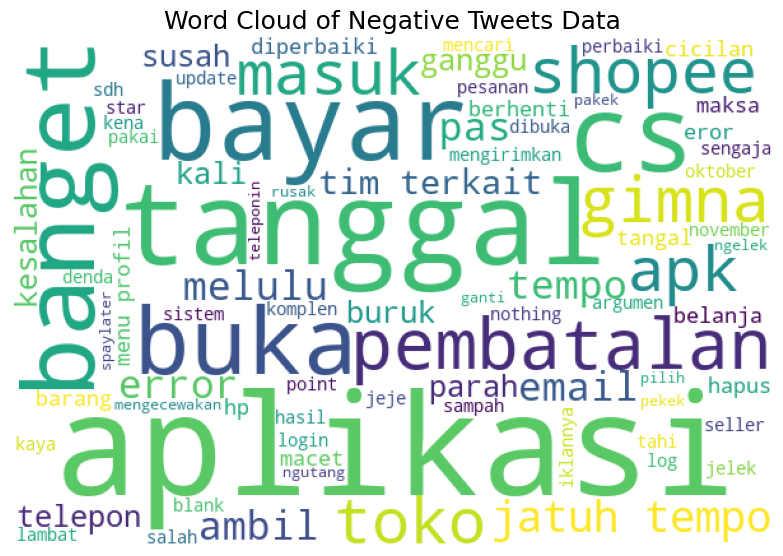

In [179]:

# Menggabungkan semua kata dari 'text_stopword' menggunakan join() untuk efisiensi
list_words = ' '.join(word for tweet in negative_tweets['text_stopword'] for word in tweet)
word_freq = Counter(word for tweet in negative_tweets['text_stopword'] for word in tweet)

# Membuat objek WordCloud dengan parameter tertentu
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
# Jika menggunakan frekuensi: wordcloud.generate_from_frequencies(word_freq)

# Membuat gambar dan sumbu untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu
ax.grid(False)

# Menampilkan word cloud dalam gambar
ax.imshow(wordcloud)

# Mengatur layout gambar
fig.tight_layout(pad=0)

# Menyembunyikan sumbu
ax.axis('off')

# Menampilkan word cloud
plt.show()

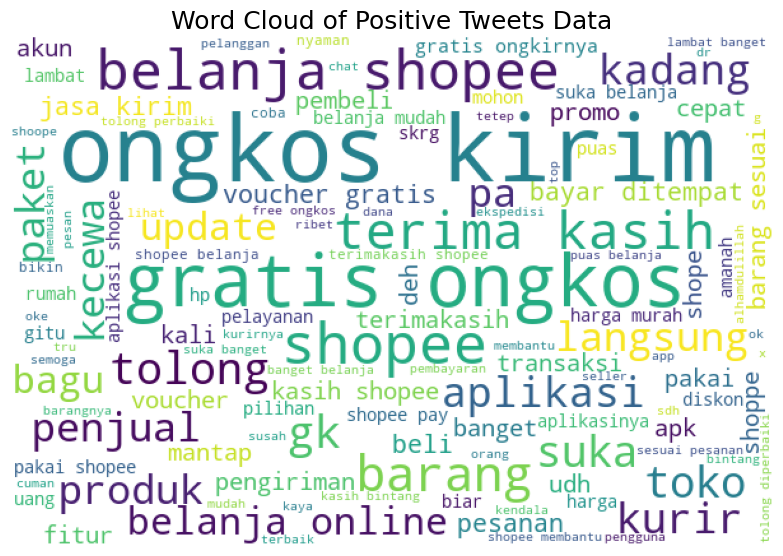

In [180]:
# Menggabungkan semua kata dari 'text_stopword' menggunakan join() untuk efisiensi
list_words = ' '.join(word for tweet in positive_tweets['text_stopword'] for word in tweet)

word_freq = Counter(word for tweet in positive_tweets['text_stopword'] for word in tweet)

# Membuat objek WordCloud dengan parameter tertentu
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
# Jika menggunakan frekuensi: wordcloud.generate_from_frequencies(word_freq)

# Membuat gambar dan sumbu untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu
ax.grid(False)

# Menampilkan word cloud dalam gambar
ax.imshow(wordcloud)

# Mengatur layout gambar
fig.tight_layout(pad=0)

# Menyembunyikan sumbu
ax.axis('off')

# Menampilkan word cloud
plt.show()

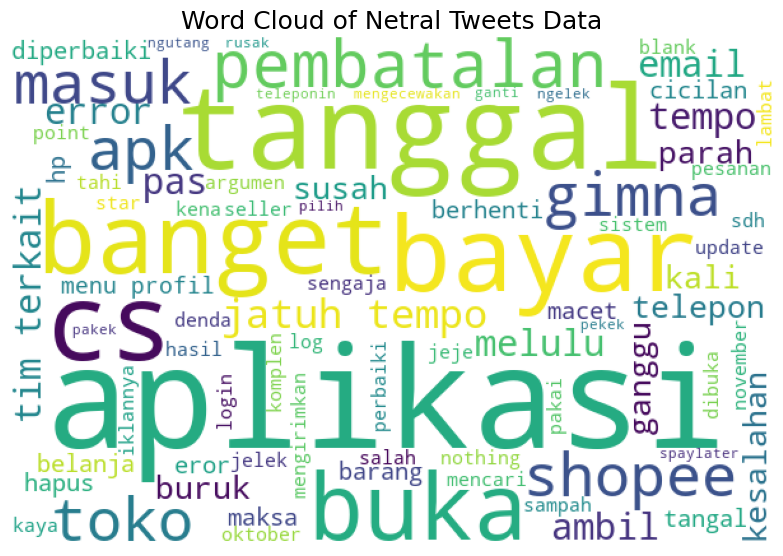

In [181]:
# Menggabungkan semua kata dari 'text_stopword' menggunakan join() untuk efisiensi
list_words = ' '.join(word for tweet in netral_tweets['text_stopword'] for word in tweet)

word_freq = Counter(word for tweet in netral_tweets['text_stopword'] for word in tweet)

# Membuat objek WordCloud dengan parameter tertentu
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
# Jika menggunakan frekuensi: wordcloud.generate_from_frequencies(word_freq)

# Membuat gambar dan sumbu untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud
ax.set_title('Word Cloud of Netral Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu
ax.grid(False)

# Menampilkan word cloud dalam gambar
ax.imshow(wordcloud)

# Mengatur layout gambar
fig.tight_layout(pad=0)

# Menyembunyikan sumbu
ax.axis('off')

# Menampilkan word cloud
plt.show()

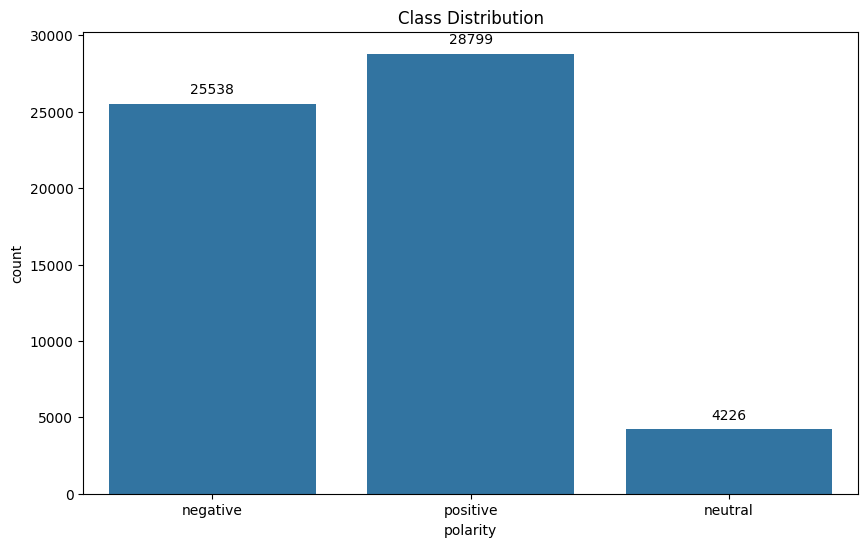

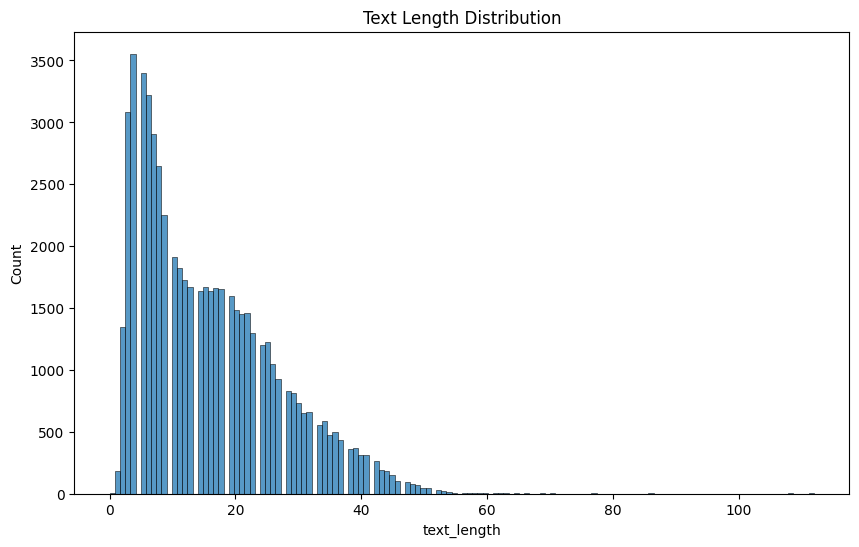

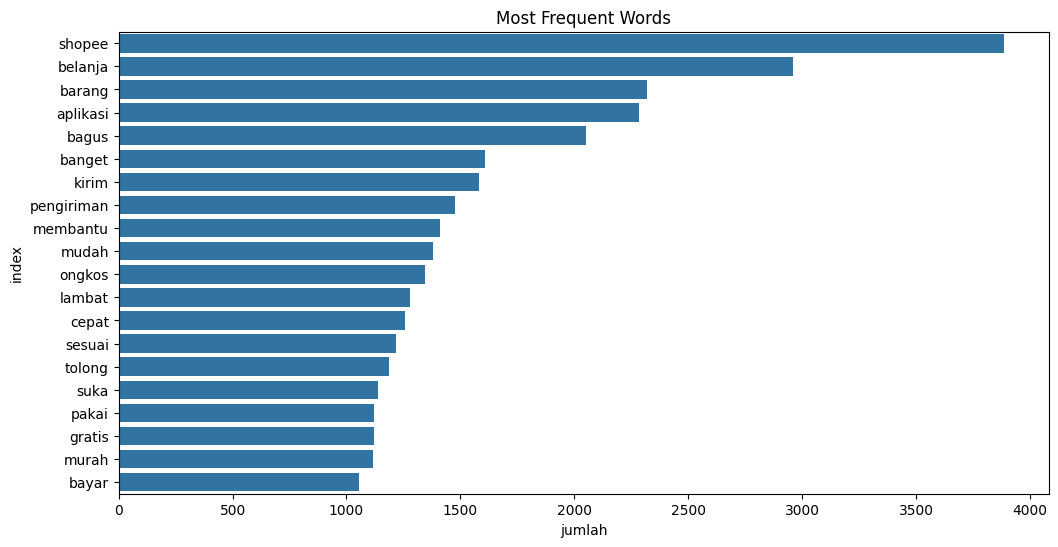

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

# Data Spliting

In [183]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
import requests
from io import StringIO
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [184]:
print(clean_df['polarity'].unique())

['negative' 'positive' 'neutral']


In [185]:
sentiment_mapping = {'neutral': 0, 'negative': 1, 'positive': 2}
clean_df['polarity'] = clean_df['polarity'].map(sentiment_mapping)

clean_df = clean_df[['text_akhir', 'polarity']]
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58563 entries, 0 to 58562
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text_akhir  58563 non-null  object
 1   polarity    58563 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 915.2+ KB


In [186]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

In [187]:
y.value_counts()

polarity
2    28799
1    25538
0     4226
Name: count, dtype: int64

In [188]:
# Pisahkan data menjadi train dan test
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [189]:
from imblearn.over_sampling import SMOTE
from collections import Counter
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train_raw)
X_test_tfidf = vectorizer.transform(X_test_raw)

# Terapkan SMOTE hanya pada data pelatihan
smote = SMOTE(random_state=42)
X_train_tfidf_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

print("Distribusi label setelah SMOTE:", Counter(y_train_smote))

Distribusi label setelah SMOTE: Counter({1: 23039, 2: 23039, 0: 23039})


#  Skema pelatihan



Skema 1 = Logistic Regression + TF-IDF + Pembagaian data (80/20)

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Model Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000,C=2.0)  # Tambahkan max_iter untuk konvergensi
lr.fit(X_train_tfidf_smote, y_train_smote)

# Prediksi
y_pred_lr = lr.predict(X_test_tfidf)

# Evaluasi Model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("\nEvaluasi Model Logistic Regression:")
print(f"Accuracy: {accuracy_lr}")
print(classification_report(y_test, y_pred_lr, target_names=['negatif', 'positif', 'neutral']))



Evaluasi Model Logistic Regression:
Accuracy: 0.8741569196619141
              precision    recall  f1-score   support

     negatif       0.39      0.58      0.46       845
     positif       0.92      0.89      0.91      5108
     neutral       0.94      0.90      0.92      5760

    accuracy                           0.87     11713
   macro avg       0.75      0.79      0.76     11713
weighted avg       0.89      0.87      0.88     11713



Skema 2 = LinearSVM + TF-IDF + Pembagaian data (80/20)

In [191]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Gunakan LinearSVC untuk mempercepat training
svm = LinearSVC(random_state=42, max_iter=5000, C=3.0)

# Latih model
svm.fit(X_train_tfidf_smote, y_train_smote)

# Prediksi
y_pred_svm = svm.predict(X_test_tfidf)

# Evaluasi akurasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nEvaluasi Model  linear SVM:")
print(f"Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm, target_names=['negatif', 'positif', 'neutral']))



Evaluasi Model  linear SVM:
Accuracy: 0.9060872534790404
              precision    recall  f1-score   support

     negatif       0.50      0.49      0.49       845
     positif       0.93      0.93      0.93      5108
     neutral       0.94      0.94      0.94      5760

    accuracy                           0.91     11713
   macro avg       0.79      0.79      0.79     11713
weighted avg       0.91      0.91      0.91     11713



Skema 3 = Random Forest + TF-IDF + Pembagaian data (80/20)

In [192]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1
)
rf.fit(X_train_tfidf_smote, y_train_smote)
y_pred_rf = rf.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nEvaluasi Model Random Forest:")
print(f"Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf, target_names=['neutral', 'negatif', 'positif']))


Evaluasi Model Random Forest:
Accuracy: 0.807222743959703
              precision    recall  f1-score   support

     neutral       0.55      0.43      0.48       845
     negatif       0.80      0.85      0.82      5108
     positif       0.85      0.82      0.84      5760

    accuracy                           0.81     11713
   macro avg       0.73      0.70      0.71     11713
weighted avg       0.80      0.81      0.80     11713



# Deep Learning

In [193]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Gunakan data TF-IDF hasil sebelumnya
# X_train_tfidf_smote, y_train_smote, X_test_tfidf, y_test

# Buat model MLP (Multi-Layer Perceptron)
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), 
                    activation='relu', 
                    solver='adam', 
                    max_iter=300, 
                    random_state=42)

# Training
mlp.fit(X_train_tfidf_smote, y_train_smote)

# Prediksi
y_pred_mlp = mlp.predict(X_test_tfidf)

# Evaluasi
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print("\nEvaluasi MLP Classifier:")
print(f"Akurasi: {acc_mlp:.4f}")
print(classification_report(y_test, y_pred_mlp, target_names=['negatif', 'positif', 'neutral']))



Evaluasi MLP Classifier:
Akurasi: 0.9063
              precision    recall  f1-score   support

     negatif       0.52      0.50      0.51       845
     positif       0.93      0.94      0.93      5108
     neutral       0.94      0.94      0.94      5760

    accuracy                           0.91     11713
   macro avg       0.80      0.79      0.79     11713
weighted avg       0.91      0.91      0.91     11713



In [194]:
# Bandingkan akurasi keempat model
accuracies = {'SVM': accuracy_svm, 'Random Forest': accuracy_rf, 'Logistic Regression': accuracy_lr, 'MLP':acc_mlp}

best_model_name = max(accuracies, key=accuracies.get)
print("\nModel terbaik berdasarkan akurasi:", best_model_name)


Model terbaik berdasarkan akurasi: MLP


In [195]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek vectorizer (TF-IDF) yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = vectorizer.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru menggunakan model terbaik
prediksi_sentimen = mlp.predict(X_kalimat_baru)

# Mapping kembali dari angka ke label sentimen
sentiment_mapping_reverse = {0: 'neutral', 1: 'negatif', 2: 'positif'}
hasil_sentimen = sentiment_mapping_reverse[prediksi_sentimen[0]]

# Menampilkan hasil prediksi
print(f"Sentimen kalimat baru adalah: {hasil_sentimen.upper()}.")

Sentimen kalimat baru adalah: POSITIF.


# Kesimpulan

Berdasarkan analisis sentimen menggunakan berbagai model machine learning, mayoritas ulasan pengguna terhadap aplikasi Shopee menunjukkan sentimen positif, yang mencerminkan tingkat kepuasan yang tinggi terhadap layanan dan pengalaman pengguna secara keseluruhan. Hal ini menunjukkan bahwa Shopee telah berhasil membangun kepercayaan dan loyalitas pelanggan melalui fitur-fitur yang responsif, promosi yang menarik, serta kemudahan dalam proses belanja online. Namun, tetap terdapat sebagian kecil sentimen negatif dan netral yang dapat dijadikan masukan penting bagi Shopee untuk terus meningkatkan kualitas layanan, seperti optimalisasi sistem, peningkatan kecepatan aplikasi, dan pelayanan pelanggan. Kesimpulan ini dapat menjadi dasar strategis dalam pengambilan keputusan bisnis untuk mempertahankan daya saing dan meningkatkan pengalaman pengguna di masa mendatang.